In [2]:
import pandas as pd
import numpy as np

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

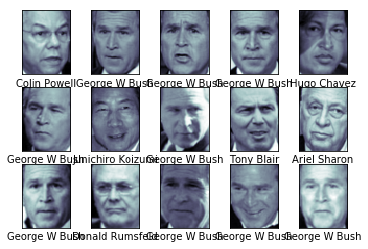

In [6]:
fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])

In [7]:
from sklearn.decomposition import RandomizedPCA

In [8]:
pca = RandomizedPCA(n_components=150, whiten =True,random_state= 42)

In [10]:
from sklearn.svm import SVC

In [11]:
svc = SVC(kernel='rbf',class_weight='balanced')

In [12]:
from sklearn.pipeline import make_pipeline

In [13]:
model = make_pipeline(pca,svc)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(faces.data,faces.target,random_state = 42)

In [15]:
from sklearn.grid_search import GridSearchCV

In [17]:
param_grid = {'svc__C':[1,5,10,50],
                'svc__gamma':[.0001,0.005,0.001,0.005]}

In [18]:
grid = GridSearchCV(model , param_grid)

In [19]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('randomizedpca', RandomizedPCA(copy=True, iterated_power=2, n_components=150, random_state=42,
       whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [20]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('randomizedpca', RandomizedPCA(copy=True, iterated_power=2, n_components=150, random_state=42,
       whiten=True)), ('svc', SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [21]:
model = grid.best_estimator_

In [22]:
y_pred = model.predict(X_test)

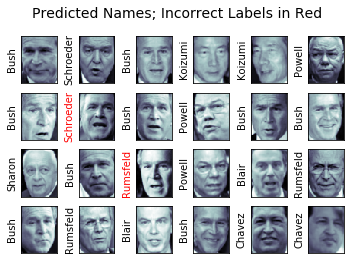

In [24]:
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62 ,47),cmap ='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                  color = 'black' if y_pred[i] == y_test[i] else 'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red',size = 14);

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,
                           target_names= faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.87      0.72        15
     Colin Powell       0.88      0.87      0.87        68
  Donald Rumsfeld       0.80      0.77      0.79        31
    George W Bush       0.93      0.79      0.86       126
Gerhard Schroeder       0.61      0.74      0.67        23
      Hugo Chavez       0.76      0.80      0.78        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.80      0.95      0.87        42

      avg / total       0.85      0.83      0.84       337



In [27]:
import seaborn as sns

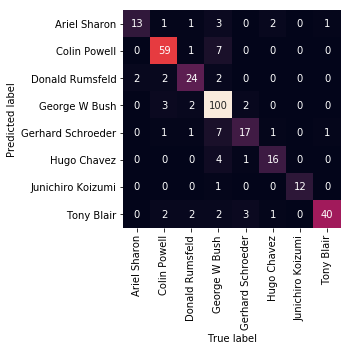

In [29]:

from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test,y_pred)
sns.heatmap(matrix.T, square =True, annot =True , fmt='d',cbar=False,
           xticklabels = faces.target_names,
           yticklabels = faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label');